In [1]:
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.channels import make_standard_montage
from mne import events_from_annotations
from mne.viz import plot_events

In [2]:
from sklearn.decomposition import PCA, FastICA

https://mne.tools/dev/generated/mne.datasets.eegbci.load_data.html

https://mne.tools/stable/overview/datasets_index.html#eegbci-motor-imagery

In [4]:
tasks_execution = [5, 9, 13]
tasks_imagery = [6, 10, 14]
sample = 31
raw_fnames_execution = eegbci.load_data(sample, tasks_execution)
raw_fnames_imagery = eegbci.load_data(sample, tasks_execution)
raws_execution = [read_raw_edf(f, preload=True) for f in raw_fnames_execution]
raws_imagery = [read_raw_edf(f, preload=True) for f in raw_fnames_imagery]
raw_all = []
raw_all.append(concatenate_raws(raws_execution))
raw_all.append(concatenate_raws(raws_imagery))
raw = concatenate_raws(raw_all)

Extracting EDF parameters from /home/abumbier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S031/S031R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/abumbier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S031/S031R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/abumbier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S031/S031R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /home/abumbier/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S031/S031R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs

# Load data

In [5]:
eegbci.standardize(raw)

In [6]:
montage = make_standard_montage('standard_1005')

In [7]:
raw.set_montage(montage)

<RawEDF | S031R05.edf, 64 x 118080 (738.0 s), ~57.7 MB, data loaded>

Using matplotlib as 2D backend.


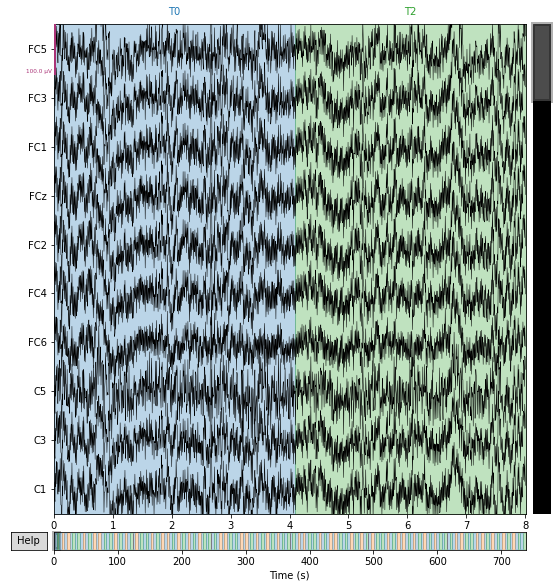

In [8]:
_ = raw.plot(n_channels=10, scalings='auto', duration=8, remove_dc=False)

https://www.youtube.com/watch?v=B9ti7boa9jc

Effective window size : 12.800 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


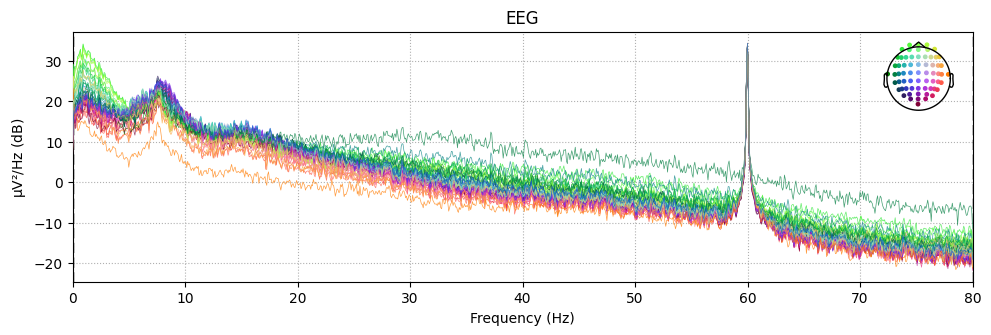

In [9]:
_ = raw.plot_psd()

Effective window size : 12.800 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


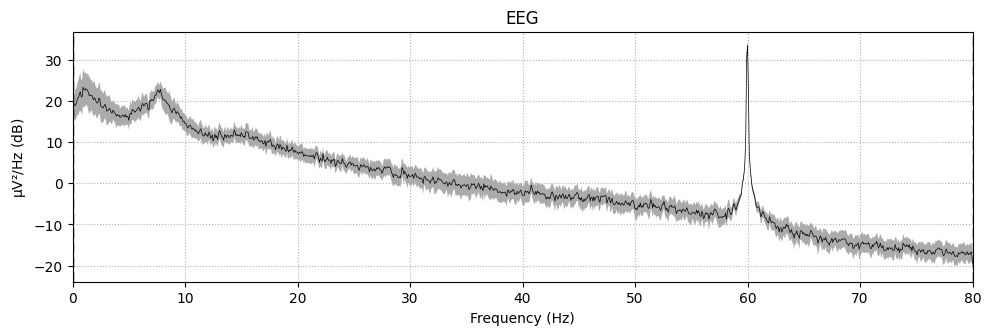

In [10]:
_ = raw.plot_psd(average=True)

In [11]:
events, event_dict = events_from_annotations(raw)

Used Annotations descriptions: ['T0', 'T1', 'T2']


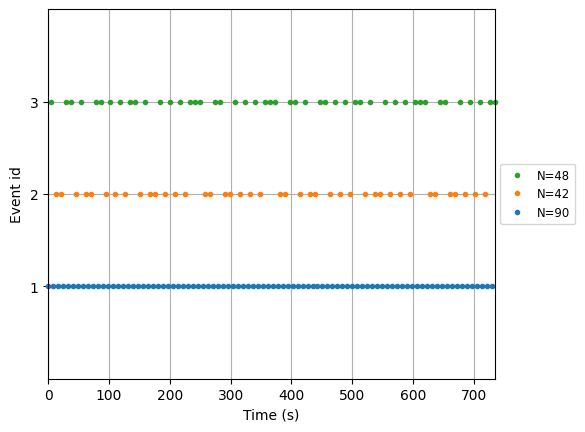

In [12]:
_ = plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

In [13]:
eeg_channels = mne.pick_types(edf_raw.info, eeg=True)

NameError: name 'mne' is not defined

In [14]:
eeg_channels

NameError: name 'eeg_channels' is not defined

### Filtering

Guide: https://mne.tools/stable/auto_tutorials/preprocessing/25_background_filtering.html

In [27]:
raw.filter(5., 40., fir_design="firwin", skip_by_annotation="edge")

Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


<RawEDF | S031R05.edf, 64 x 118080 (738.0 s), ~57.7 MB, data loaded>

Effective window size : 12.800 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


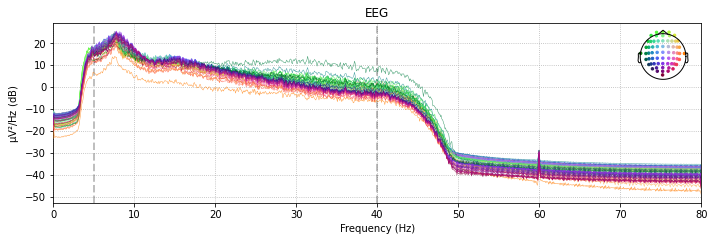

In [28]:
_ = raw.plot_psd()

### Parsing

In [ ]:
https://www.youtube.com/watch?v=B9ti7boa9jc